In [286]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [241]:
# Prototype model
# define similarity
def prototype_sim(discriminability, latent, stimulus) :
    s = np.exp(-((latent - stimulus) / discriminability)**2)
    return(s)

# latent activation is normalized similarity
def prototype_activation(discrminability, latent_vector, stimulus) :
    act = prototype_sim(discriminability, latent_vector, stimulus)
    act = act / np.sum(act)
    return(act)

def prototype_category(weights, activation) :
    cat = np.zeros(2)
    cat[0] = np.dot(weights[0,0,:], activation[:,0]) + np.dot(weights[0,1,:], activation[:,1])
    cat[1] = np.dot(weights[1,0,:], activation[:,0]) + np.dot(weights[1,1,:], activation[:,1])
    return(cat)

def choice_probability(sensitivity, response_activation) :
    prob = np.exp(sensitivity * response_activation)
    prob = prob / np.sum(prob)
    return(prob)
i
def prototype(learning_rate, sensitivity, discriminability, training, test):
    representation = np.vstack([np.arange(m) * (12/(m-1)), np.arange(m) * (12/(m-1))])
    representation = representation.transpose()
    latent = np.zeros([m,2])
    output = np.zeros([m,2])
    WA = np.zeros([2,2,m]) # Choice x dimension x level
    WB = np.zeros([2,2,m])
    chance_correct = np.zeros([test.shape[1],2])
    
    weights = np.zeros([2,2,m]) # Initial weights
    for i in range(training.shape[1]) :
        # Train on an A
        latent[:,0] = prototype_activation(discriminability, representation[:,0], training[0,i,0])
        latent[:,1] = prototype_activation(discriminability, representation[:,1], training[0,i,1])
        output = prototype_category(weights, latent)
        WA[0,:,:] = learning_rate * ( 1 - output[0]) * latent.transpose()
        WA[1,:,:] = learning_rate * ( 0 - output[1]) * latent.transpose()

        # Train on a B
        latent[:,0] = prototype_activation(discriminability, representation[:,0], training[1,i,0])
        latent[:,1] = prototype_activation(discriminability, representation[:,1], training[1,i,1])
        output = prototype_category(weights, latent)
        WB[0,:,:] = learning_rate * ( 0 - output[0]) * latent.transpose()
        WB[1,:,:] = learning_rate * ( 1 - output[1]) * latent.transpose()
        
        weights = weights + WA + WB

        
    for i in range(test.shape[1]) :
        latent[:,0] = prototype_activation(discriminability, representation[:,0], test[0,i,0])
        latent[:,1] = prototype_activation(discriminability, representation[:,1], test[0,i,1])
        output = prototype_category(weights, latent)
        chance_correct[i,0] = choice_probability(sensitivity, output)[0]
        latent[:,0] = prototype_activation(discriminability, representation[:,0], test[1,i,0])
        latent[:,1] = prototype_activation(discriminability, representation[:,1], test[1,i,1])
        output = prototype_category(weights, latent)
        chance_correct[i,1] = choice_probability(sensitivity, output)[1]
    return({"weights": weights, "test_accuracy": chance_correct})

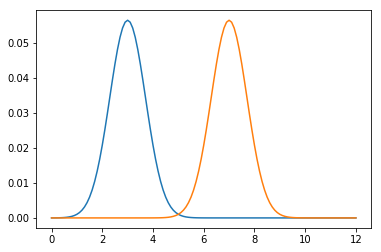

In [42]:
# Prototype Example 1
# Set parameters
m = 121
discriminability = 1

# represent level in a dimension of a stimulus as a cell in a vector, with one vector per dimension
representation = np.vstack([np.arange(m) * (12/(m-1)), np.arange(m) * (12/(m-1))])
representation = representation.transpose()

stimulus = np.array([3,7])

output = np.zeros([m,2])
output[:,0] = prototype_activation(discriminability, representation[:,0], stimulus[0])
output[:,1] = prototype_activation(discriminability, representation[:,1], stimulus[1])

plt.plot(representation[:,0], output[:,0])
plt.plot(representation[:,0], output[:,1])

[0.99803024 0.99455482]


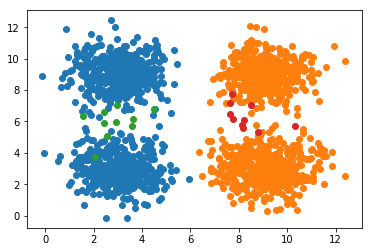

In [243]:
## Linear bound
discriminability = 5
sensitivity = 10
learning_rate = .4

training_A = np.vstack([np.hstack([np.random.normal(3, 1, 400), np.random.normal(3, 1, 400)]),
                       np.hstack([np.random.normal(3, 1, 400), np.random.normal(9, 1, 400)])])
training_A = training_A.transpose()
training_B = np.vstack([np.hstack([np.random.normal(9, 1, 400), np.random.normal(9, 1, 400)]),
                       np.hstack([np.random.normal(3, 1, 400), np.random.normal(9, 1, 400)])])
training_B = training_B.transpose()
plt.scatter(training_A[:,0], training_A[:,1])
plt.scatter(training_B[:,0], training_B[:,1])

test_A = np.vstack([np.random.normal(3, 1, 10), np.random.normal(6, 1, 10)])
test_A = test_A.transpose()
test_B = np.vstack([np.random.normal(9, 1, 10), np.random.normal(6, 1, 10)])
test_B = test_B.transpose()

plt.scatter(test_A[:,0], test_A[:,1])
plt.scatter(test_B[:,0], test_B[:,1])


results = prototype(learning_rate, sensitivity, discriminability, np.stack([training_A,training_B]), np.stack([test_A, test_B]))
print(np.mean(results['test_accuracy'],0))

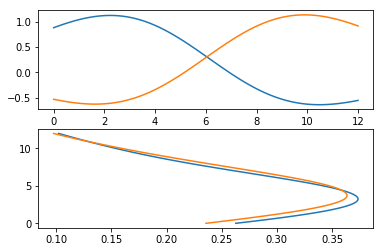

In [259]:
ax = plt.subplot(2, 1, 1)

plt.plot(representation[:,0],results["weights"][0,0,:])
plt.plot(representation[:,0],results["weights"][1,0,:])
ax = plt.subplot(2, 1, 2)
plt.plot(results["weights"][0,1,:],representation[:,0])
plt.plot(results["weights"][1,1,:],representation[:,0])

[0.07793631 0.91674162]


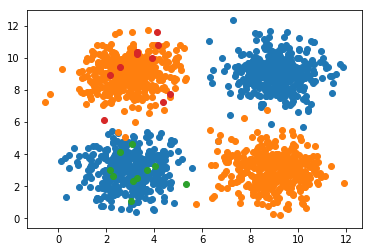

In [260]:
## X-OR bound
discriminability = 5
sensitivity = 10
learning_rate = .4

training_A = np.vstack([np.hstack([np.random.normal(3, 1, 400), np.random.normal(9, 1, 400)]),
                       np.hstack([np.random.normal(3, 1, 400), np.random.normal(9, 1, 400)])])
training_A = training_A.transpose()
training_B = np.vstack([np.hstack([np.random.normal(9, 1, 400), np.random.normal(3, 1, 400)]),
                       np.hstack([np.random.normal(3, 1, 400), np.random.normal(9, 1, 400)])])
training_B = training_B.transpose()
plt.scatter(training_A[:,0], training_A[:,1])
plt.scatter(training_B[:,0], training_B[:,1])

test_A = np.vstack([np.random.normal(3, 1, 10), np.random.normal(3, 1, 10)])
test_A = test_A.transpose()
test_B = np.vstack([np.random.normal(3, 1, 10), np.random.normal(9, 1, 10)])
test_B = test_B.transpose()

plt.scatter(test_A[:,0], test_A[:,1])
plt.scatter(test_B[:,0], test_B[:,1])


results = prototype(learning_rate, sensitivity, discriminability, np.stack([training_A,training_B]), np.stack([test_A, test_B]))
print(np.mean(results['test_accuracy'],0))

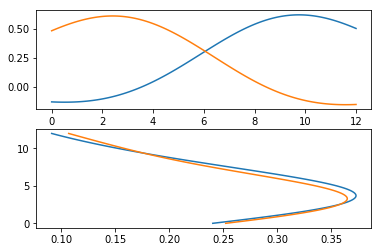

In [261]:
ax = plt.subplot(2, 1, 1)

plt.plot(representation[:,0],results["weights"][0,0,:])
plt.plot(representation[:,0],results["weights"][1,0,:])
ax = plt.subplot(2, 1, 2)
plt.plot(results["weights"][0,1,:],representation[:,0])
plt.plot(results["weights"][1,1,:],representation[:,0])

In [360]:
# Exemplar model
# define similarity
def exemplar_sim(discriminability, latent_x, latent_y, stimulus) :
    s = np.exp(-((latent_x - stimulus[0]) / discriminability)**2) * np.exp(-((latent_y - stimulus[1]) / discriminability)**2)
    return(s)

# latent activation is normalized similarity
def exemplar_activation(discrminability, latent_x, latent_y, stimulus) :
    act = exemplar_sim(discriminability, latent_x, latent_y, stimulus)
    act = act / np.sum(act)
    return(act)

def exemplar_category(weights, activation) :
    cat = np.zeros(2)
    cat[0] = np.sum(weights[0,:,:] * activation)
    cat[1] = np.sum(weights[1,:,:] * activation)
    return(cat)

# Choice rule is the same as exemplar model
#def choice_probability(sensitivity, response_activation) :
#    prob = np.exp(sensitivity * response_activation)
#    prob = prob / np.sum(prob)
#    return(prob)

def exemplar(learning_rate, sensitivity, discriminability, training, test):
    [representation_x, representation_y] = np.meshgrid(np.linspace(0,12,m), np.linspace(0,12,m))
    latent = np.zeros([m,2])
    output = np.zeros([m,2])
    WA = np.zeros([2,m,m]) # Choice x dimension x level
    WB = np.zeros([2,m,m])
    chance_correct = np.zeros([test.shape[1],2])
    
    weights = np.zeros([2,m ,m]) # Initial weights
    for i in range(training.shape[1]) :
        # Train on an A
        latent = exemplar_activation(discriminability, representation_x, representation_y, training[0,i,:])
        output = exemplar_category(weights, latent)
        WA[0,:,:] = learning_rate * ( 1 - output[0]) * latent
        WA[1,:,:] = learning_rate * ( 0 - output[1]) * latent

        # Train on a B
        latent = exemplar_activation(discriminability, representation_x, representation_y, training[1,i,:])
        output = exemplar_category(weights, latent)
        WB[0,:,:] = learning_rate * ( 0 - output[0]) * latent
        WB[1,:,:] = learning_rate * ( 1 - output[1]) * latent
        
        weights = weights + WA + WB

        
    for i in range(test.shape[1]) :
        latent = exemplar_activation(discriminability, representation_x, representation_y, test[0,i,:])
        output = exemplar_category(weights, latent)
        chance_correct[i,0] = choice_probability(sensitivity, output)[0]
        latent = exemplar_activation(discriminability, representation_x, representation_y, test[1,i,:])
        output = exemplar_category(weights, latent)
        chance_correct[i,1] = choice_probability(sensitivity, output)[1]
    
    return({"weights": weights, "test_accuracy": chance_correct})

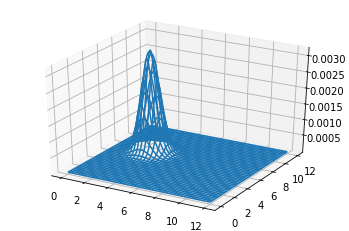

In [359]:
# Exemplar Example 1
# Set parameters
m = 121
discriminability = 1

# represent level in a dimension of a stimulus as a cell in a vector, with one vector per dimension
[representation_x, representation_y] = np.meshgrid(np.linspace(0,12,m), np.linspace(0,12,m))


stimulus = np.array([3,7])

output = exemplar_activation(discriminability, representation_x, representation_y, stimulus)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_wireframe(representation_x, representation_y, output)


[0.59272162 0.594395  ]


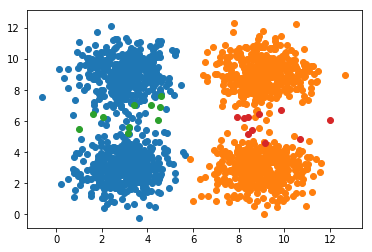

In [365]:
## Linear bound
discriminability = 5
sensitivity = 10
learning_rate = .4

training_A = np.vstack([np.hstack([np.random.normal(3, 1, 400), np.random.normal(3, 1, 400)]),
                       np.hstack([np.random.normal(3, 1, 400), np.random.normal(9, 1, 400)])])
training_A = training_A.transpose()
training_B = np.vstack([np.hstack([np.random.normal(9, 1, 400), np.random.normal(9, 1, 400)]),
                       np.hstack([np.random.normal(3, 1, 400), np.random.normal(9, 1, 400)])])
training_B = training_B.transpose()
plt.scatter(training_A[:,0], training_A[:,1])
plt.scatter(training_B[:,0], training_B[:,1])

test_A = np.vstack([np.random.normal(3, 1, 10), np.random.normal(6, 1, 10)])
test_A = test_A.transpose()
test_B = np.vstack([np.random.normal(9, 1, 10), np.random.normal(6, 1, 10)])
test_B = test_B.transpose()

plt.scatter(test_A[:,0], test_A[:,1])
plt.scatter(test_B[:,0], test_B[:,1])


results = exemplar(learning_rate, sensitivity, discriminability, np.stack([training_A,training_B]), np.stack([test_A, test_B]))
print(np.mean(results['test_accuracy'],0))

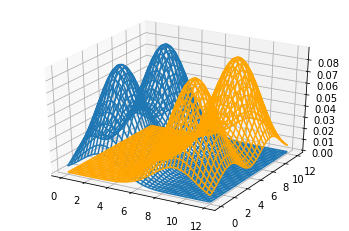

In [366]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_wireframe(representation_x, representation_y, results["weights"][0,:,:])
ax.plot_wireframe(representation_x, representation_y, results["weights"][1,:,:], colors='orange')

[0.52436701 0.52428762]


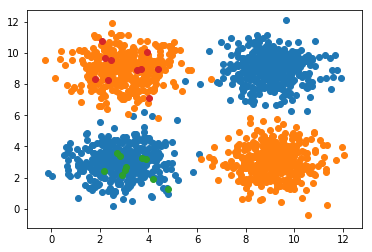

In [369]:
## X-OR bound
discriminability = 4
sensitivity = 10
learning_rate = .4

training_A = np.vstack([np.hstack([np.random.normal(3, 1, 400), np.random.normal(9, 1, 400)]),
                       np.hstack([np.random.normal(3, 1, 400), np.random.normal(9, 1, 400)])])
training_A = training_A.transpose()
training_B = np.vstack([np.hstack([np.random.normal(9, 1, 400), np.random.normal(3, 1, 400)]),
                       np.hstack([np.random.normal(3, 1, 400), np.random.normal(9, 1, 400)])])
training_B = training_B.transpose()
plt.scatter(training_A[:,0], training_A[:,1])
plt.scatter(training_B[:,0], training_B[:,1])

test_A = np.vstack([np.random.normal(3, 1, 10), np.random.normal(3, 1, 10)])
test_A = test_A.transpose()
test_B = np.vstack([np.random.normal(3, 1, 10), np.random.normal(9, 1, 10)])
test_B = test_B.transpose()

plt.scatter(test_A[:,0], test_A[:,1])
plt.scatter(test_B[:,0], test_B[:,1])


results = exemplar(learning_rate, sensitivity, discriminability, np.stack([training_A,training_B]), np.stack([test_A, test_B]))
print(np.mean(results['test_accuracy'],0))

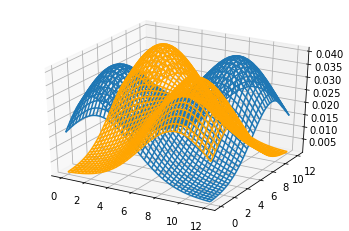

In [370]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_wireframe(representation_x, representation_y, results["weights"][0,:,:])
ax.plot_wireframe(representation_x, representation_y, results["weights"][1,:,:], colors='orange')